# 1. Early EDA and Data Cleaning

## 1.1 Imports

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
import time

from matplotlib.ticker import MultipleLocator, LinearLocator, AutoMinorLocator
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.model_selection import KFold, RepeatedKFold, GridSearchCV, train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor

In [ ]:
data = pd.read_csv("/data/Walmart.csv")
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


## 1.2 Data Understanding

Data Description:

One of the leading retail stores in the US, Walmart, would like to predict the sales and demand accurately. There are certain events and holidays which impact sales on each day. There are sales data available for 45 stores of Walmart. The business is facing a challenge due to unforeseen demands and runs out of stock some times, due to the inappropriate machine learning algorithm. An ideal ML algorithm will predict demand accurately and ingest factors like economic conditions including CPI, Unemployment Index, etc.

Walmart runs several promotional markdown events throughout the year. These markdowns precede prominent holidays, the four largest of all, which are the Super Bowl, Labour Day, Thanksgiving, and Christmas. The weeks including these holidays are weighted five times higher in the evaluation than non-holiday weeks. Part of the challenge presented by this competition is modeling the effects of markdowns on these holiday weeks in the absence of complete/ideal historical data. Historical sales data for 45 Walmart stores located in different regions are available.

Column Description:
- Store - the store number
- Date - the week of sales
- Weekly_Sales - sales for the given store
- Holiday_Flag - whether the week is a special holiday week 1 – Holiday week 0 – Non-holiday week
- Temperature - Temperature on the day of sale
- Fuel_Price - Cost of fuel in the region
- CPI – Prevailing consumer price index
- Unemployment - Prevailing unemployment rate
- Holiday Events\
Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13\
Labour Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13\
Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13\
Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [ ]:
# Dimensions of the dataset

print("This dataset contains", data.shape[0],"rows and", data.shape[1],"columns. Where the Weekly_Sales column is the target column")

This dataset contains 6435 rows and 8 columns. Where the Weekly_Sales column is the target column


From the information above, here's the information obtained:
- The "Date" column should be of data type DateTime.
- Data only has data types integer, float and DateTime.

In [ ]:
 # Convert DD-MM-YYYY into YYYY-MM-DD format
 
data["Date"] = pd.to_datetime(data["Date"], format="%d-%m-%Y")
print("olumn 'Date' already has data type", data["Date"].dtypes)

olumn 'Date' already has data type datetime64[ns]


In [ ]:
data.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [ ]:
# Unique values for each feature
data.nunique().sort_values()

Holiday_Flag       2
Store             45
Date             143
Unemployment     349
Fuel_Price       892
CPI             2145
Temperature     3528
Weekly_Sales    6435
dtype: int64

In [ ]:
data["Holiday_Flag"].unique()

array([0, 1])

In [ ]:
data["Store"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45])

## 1.3 Checking for Nulls

In [ ]:
data.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

## 1.4 Check Duplicated Data

Features that shouldn't have duplicate values are "Store" and "Date" because there can't be 2 same stores and different data for the same date.

In [ ]:
data[data[["Store", "Date"]].duplicated() == True]

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment


In [ ]:
data[data.duplicated() == True]

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment


## 1.5 Feature Engineering: Date Variable

According to the description of the dataset, weekly sales depend on the date because usually on big holidays sales tend to increase. Unfortunately, the "Date" feature is not correlated on the heatmap because the data type is object, let's change the "Date" feature so that it can be processed.

The Date feature will be separated into 4 columns, namely: <br>
- Date (numeric date) <br>
- Day (day, i.e. Monday, Tuesday, Wednesday, etc.) <br>
- Month (month) <br>
- Year (year) <br>

In [ ]:
# Copy original data into a new DataFrame because we"re going to manipulate it
original_data = data.copy(deep=True)

In [ ]:
# Extract information from Date into columns

data["Day"] = data["Date"].dt.day # Extract day of month
data["DayOfWeek"] = data["Date"].dt.weekday # Extract day of week
data["Month"] = data["Date"].dt.month # Extract month
data["Year"]  = data["Date"].dt.year # Extract year
data["WeekOfYear"] = data["Date"].dt.isocalendar().week # Extract week of year

data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,DayOfWeek,Month,Year,WeekOfYear
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,5,4,2,2010,5
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,12,4,2,2010,6
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,19,4,2,2010,7
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,26,4,2,2010,8
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,5,4,3,2010,9


In [ ]:
data["DayOfWeek"].unique()

array([4])

After being converted into days, it turns out that there is only 1 value, it is 4. This is a natural thing because the day of recording weekly sales is indeed done on the same day, it is Friday. So we will discard the "DayOfWeek" column because it only has a single value, which of course will not affect the modeling process.

The "Date" and "DateTime" features will also be dropped because the information has been extracted into separate features.

In [ ]:
# Drop DayofWeek, Date, and DateTime column
data.drop(["DayOfWeek", "Date"], axis = 1, inplace = True)

## 1.6 Data Distribution

In [ ]:
target = "Weekly_Sales"
features = [i for i in data.columns if i not in [target]] #store all features name 
print(features)

['Store', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Day', 'Month', 'Year', 'WeekOfYear']


In [ ]:
# Separate features into categorical and numerical

categorical_features = []
numerical_features = []
threshold = 100 # This is just an estimation, a categorial feature is likely to have less than 100 unique values

for feature in features:
    if data[feature].nunique() <= threshold:
        categorical_features.append(feature)
    else:
        numerical_features.append(feature)

print("The Dataset has {} numerical & {} categorical features.".format(len(categorical_features),len(numerical_features)))
print("Numerical features are {}".format(numerical_features))
print("Categorical features are {}".format(categorical_features))

The Dataset has 6 numerical & 4 categorical features.
Numerical features are ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']
Categorical features are ['Store', 'Holiday_Flag', 'Day', 'Month', 'Year', 'WeekOfYear']


In [ ]:
# Change font size for ticks
def bigger_ticks_font_size(ax):
    ax.tick_params(axis = "x", labelsize = 13)
    ax.tick_params(axis = "y", labelsize = 13)

# Change font size for labels
def bigger_label_font_size(ax, xlabel_name, ylabel_name):
    ax.set_xlabel(xlabel_name, fontsize = 16)
    ax.set_ylabel(ylabel_name, fontsize = 16)

# Create a new color palette consisted of the extracted hex codes from Set2 palette and other additional colors
palette = ["#fc8d62", "#ffd92f", "#e5c494", "#b3b3b3", "#66c2a5", "#96b9d0", "#8da0cb", "#ce94bc", "#eba7ac", "#f5ae52"]

### 1.6.1 Data Distribution: Target

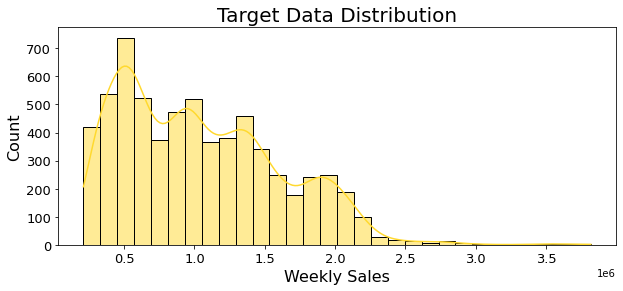

In [ ]:
#plotting label (Weekly Sales) data distribution

plt.figure(figsize=[10,4])
ax = sns.histplot(data["Weekly_Sales"], color ="#ffd92f", kde = True, bins = 30)

plt.title("Target Data Distribution", fontsize = 20)
bigger_ticks_font_size(ax)
bigger_label_font_size(ax, "Weekly Sales", "Count")

plt.show()

It can be said that the distribution of our target data does not have a normal distribution because it tends to be skewed to the right.

### 1.6.2 Data Distribution: Numerical Features

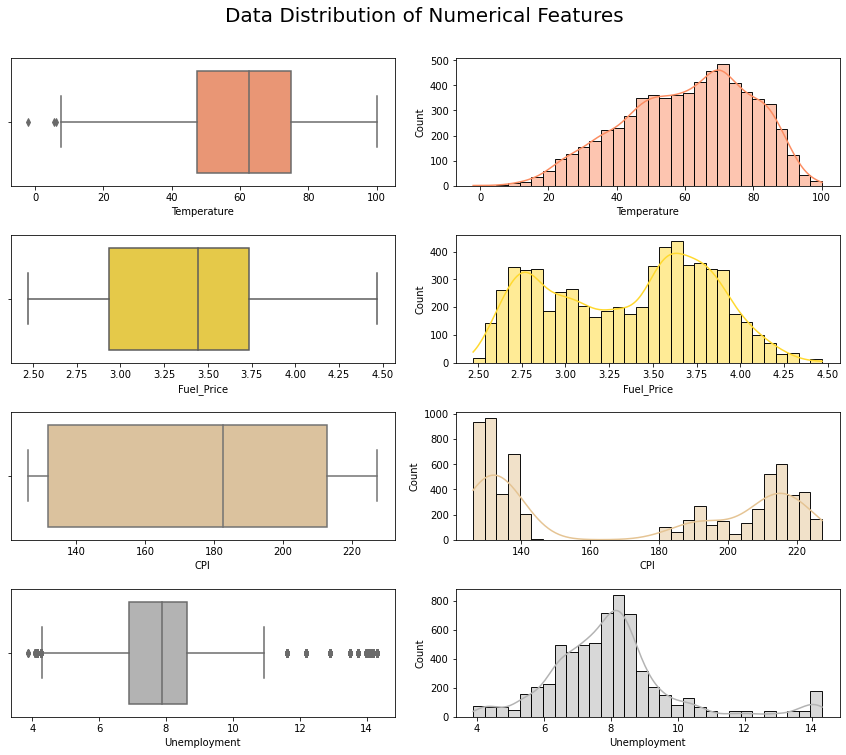

In [ ]:
# Outlier plotting using boxplot

fig, ax = plt.subplots(ncols = 2, nrows = len(numerical_features), figsize=(12, 10))
for i in enumerate (numerical_features):
  sns.boxplot(x = data[i[1]], data = data, color = palette[i[0]], ax = ax[i[0]][0])
  sns.histplot(x = data[i[1]], color = palette[i[0]], kde = True, bins = 30, ax = ax[i[0]][1])

fig.suptitle("Data Distribution of Numerical Features", fontsize = 20, y=1.05)
sns.set_context(font_scale = 5)
plt.tight_layout(pad = 1.5)

Almost all of these columns have data that are almost normally distributed, except for the CPI column.
- The temperature column is arguably the closest to the normal distribution.
- Fuel_Price column has 2 peaks.
- The Unemployment column is slightly skewed to the left.

The Temperature column, and Unemployment has outliers. We will deal with this in the next stage.

### 1.6.3 Data Distribution: Categorical Features

In [ ]:
# Function to plot categorical features using countplot
def countplot_categorical_feature(col_name, title, palette, order = None):
    ax = sns.countplot(x = data[col_name], order = order, palette = palette)
    plt.suptitle("'{}' Feature Distribution".format(title), fontsize = 20)
    #plt.suptitle("Annual Sales during 2010-2012", fontsize = 20)
    bigger_ticks_font_size(ax)
    bigger_label_font_size(ax, title, "Count")

# Function to annotate frequency of each category in barplot
def annotate_barplot (ax, data):
    for p in ax.patches:
        x = p.get_bbox().get_points()[:,0]
        y = p.get_bbox().get_points()[1,1]
        ax.annotate("{:.1f}%".format(100.*y/data), (x.mean(), y), 
            ha = "center", va = "bottom", fontsize = 12) # set the alignment of the text

# Set double axes, count axis is on right, frequency on left
def set_double_axes(ax1, ax2, data, ax1_ax2_xlabel, ax1_ylabel, ax2_ylabel):
    ax2.yaxis.tick_left()
    ax1.yaxis.tick_right()

    # Also switch the labels over
    ax1.yaxis.set_label_position("right")
    ax2.yaxis.set_label_position("left")

    annotate_barplot (ax1, len(data)) #annotate barplot

    # Use a LinearLocator to ensure the correct number of ticks
    ax1.yaxis.set_major_locator(LinearLocator(11))

    # Fix the frequency range to 0-100
    ax2.set_ylim(0,100)
    ax1.set_ylim(0,len(data))

    # And use a MultipleLocator to ensure a tick spacing of 10
    ax2.yaxis.set_major_locator(MultipleLocator(10))

    # Change font size for ticks and label
    bigger_ticks_font_size(ax1)
    bigger_ticks_font_size(ax2)
    bigger_label_font_size(ax1, ax1_ax2_xlabel, ax1_ylabel)
    bigger_label_font_size(ax2, ax1_ax2_xlabel, ax2_ylabel)

    # Need to turn the grid on ax2 off, otherwise the gridlines end up on top of the bars
    ax2.grid(None)

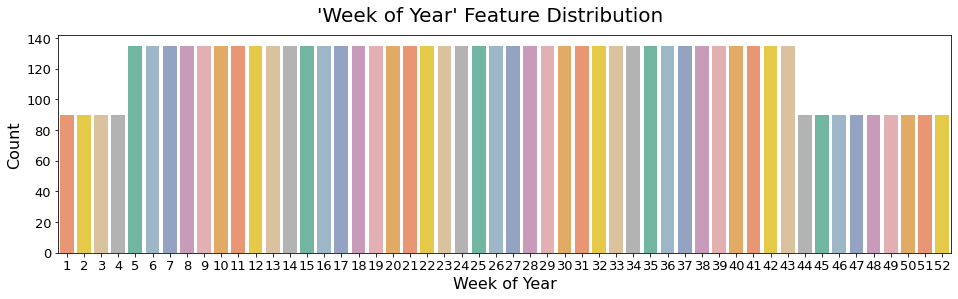

In [ ]:
# Plot "Week of Year" Feature
plt.figure(figsize=(16,4))
countplot_categorical_feature("WeekOfYear", "Week of Year", palette) #order by frequency

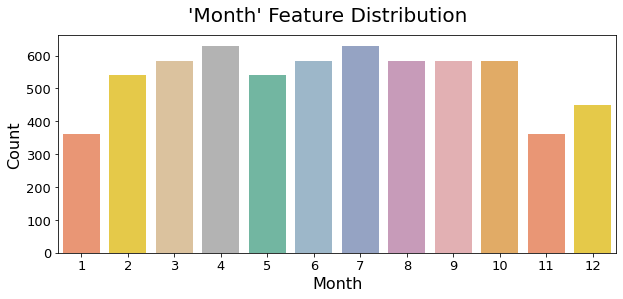

In [ ]:
plt.figure(figsize=(10,4))
countplot_categorical_feature("Month", "Month", palette)

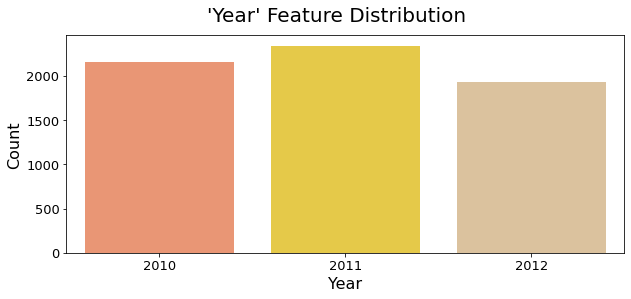

In [ ]:
plt.figure(figsize=(10,4))
countplot_categorical_feature("Year", "Year", palette)

Based on the "day" column, the recording of weekly sales is mostly done on 2-6, 9-13, 16-20, 23-27, and the least is done on the 31st, this is a natural thing because not all months have 31 days.

Based on the "week" columns, the most weekly sales are recorded in the 5th to 43rd week, and the least is done in the 1st to 4th week (January) and 44th to 52nd week (November and December).

By "month" column, the most weekly sales records were recorded in April and July, with more than 600 sales records, and the least in January and November, which were less than 400 sales records.

By year, the most weekly sales records were recorded in 2011, which was more than 2000 sales records, while the lowest was in 2012, which was less than 2000 sales.

It turns out that weekly sales are not recorded consistently every week. Does this happen because there is one/some *store* that does not record sales in a certain week? Let's see.

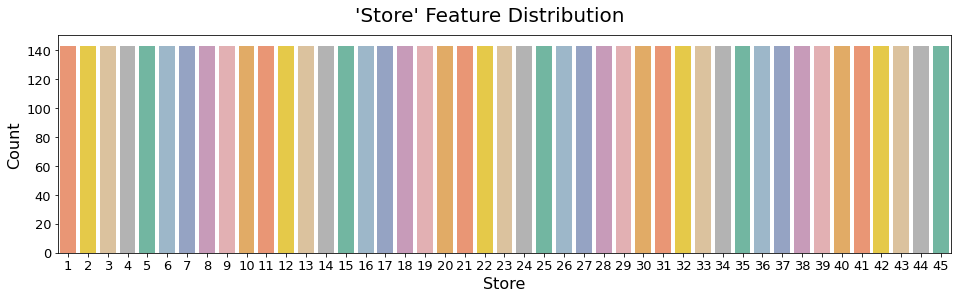

In [ ]:
plt.figure(figsize=(16,4))
countplot_categorical_feature("Store", "Store", palette)

The number of sales defects per store turned out to be the same. So the difference in recording sales per month or per year is most likely due to the absence of sales that occurred that week.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  import sys


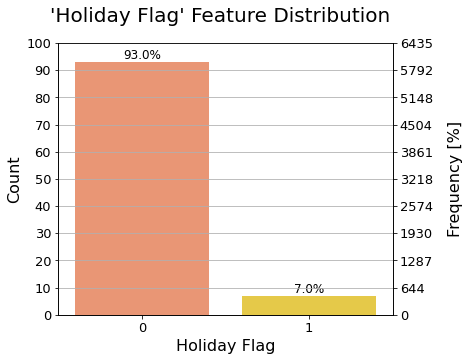

In [ ]:
# Count observation for "Holiday_Flag" columnn
plt.figure(figsize=(6, 5))
ax1 = sns.countplot(x = data["Holiday_Flag"], data = data, palette = palette)

ax2 = ax1.twinx() # Make twin axis
set_double_axes(ax1, ax2, data, "Holiday Flag", "Frequency [%]", "Count")
ax1.set_xticks([0,1],["No", "Yes"])
plt.suptitle("'Holiday Flag' Feature Distribution", fontsize = 20)

ax1.yaxis.labelpad = 15 # Increase label padding
plt.show()

In the "Holiday_Flag" feature, it seems that *value* 1 means that that week there are holidays, and vice versa *value* 0 means that there are no holidays in that week. The difference in the number of weeks that have holidays and those that don't have a comparison is closer to 1:13, this is a natural thing because there are indeed more weeks that contain weekdays than weeks that have holidays.

## 1.7 Feature Analysis

### 1.7.1 Feature Analysis: Holiday_Flag vs Weekly_Sales

In [ ]:
# Function to plot barplot with frequency annotation
def barplot_with_annotation (x, y, x_name, y_name, data, palette, ax, title_bool = False):
    ax.set_title("{} vs {}".format(x_name, y_name), fontsize = 20, pad = 15)
    ax.title.set_visible(title_bool) #to turn on and off the title 
    sns.barplot(x = x, y = y, data =  data, palette = palette, ax = ax)
    annotate_barplot(ax, data[y].sum())
    bigger_ticks_font_size(ax)
    bigger_label_font_size(ax, x_name, y_name)

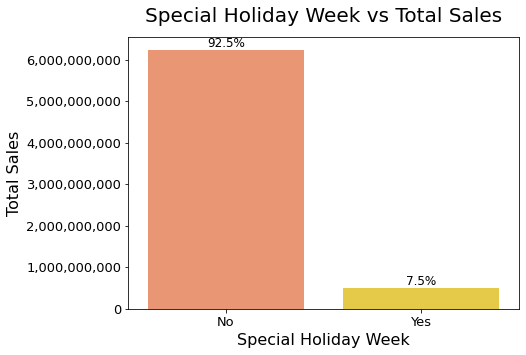

In [ ]:
# Plot total on holiday/non-holiday week
fig, ax = plt.subplots(figsize = (7, 5))
Holiday_list = ['No','Yes']
total_sales = data.groupby("Holiday_Flag")["Weekly_Sales"].agg("sum").reset_index() #group the sum of weekly sales by holiday
barplot_with_annotation("Holiday_Flag", "Weekly_Sales", "Special Holiday Week", "Total Sales", total_sales, palette, ax, True)
ax.set_xticklabels(Holiday_list)
# after plotting the data, format the labels
current_values = plt.gca().get_yticks()
# using format string '{:.0f}' here but you can choose others
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

plt.show()

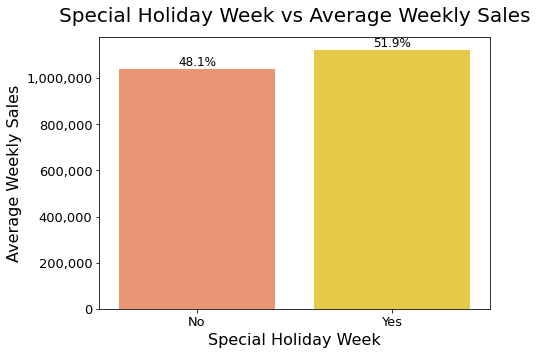

In [ ]:
# Plot average sales on holiday/non-holiday week
fig, ax = plt.subplots(figsize = (7,5))

avg_sales = data.groupby("Holiday_Flag")["Weekly_Sales"].agg("mean").reset_index() #group the mean of weekly sales by holiday
barplot_with_annotation("Holiday_Flag", "Weekly_Sales", "Special Holiday Week", "Average Weekly Sales", avg_sales, palette, ax, True)
ax.set_xticklabels(Holiday_list)
# after plotting the data, format the labels
current_values = plt.gca().get_yticks()
# using format string '{:.0f}' here but you can choose others
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.show()

**Total sales** in the week with major holidays only reached 7.5% and for the week without major holidays it reached 92.5%. This is reasonable because in 1 year there are more non-holidays than holidays (based on the previous plot of 13:1), so the total sales will certainly be a lot in the week without holidays.

However, the week with major holidays had a slightly larger **average sale** than the week without major holidays, the difference was 3.2%.

In [ ]:
data_holiday = data[data["Holiday_Flag"] == True]
data_holiday

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year,WeekOfYear
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,12,2,2010,6
31,1,1507460.69,1,78.69,2.565,211.495190,7.787,10,9,2010,36
42,1,1955624.11,1,64.52,2.735,211.748433,7.838,26,11,2010,47
47,1,1367320.01,1,48.43,2.943,211.404932,7.838,31,12,2010,52
53,1,1649614.93,1,36.39,3.022,212.936705,7.742,11,2,2011,6
...,...,...,...,...,...,...,...,...,...,...,...
6375,45,746129.56,1,71.48,3.738,186.673738,8.625,9,9,2011,36
6386,45,1170672.94,1,48.71,3.492,188.350400,8.523,25,11,2011,47
6391,45,869403.63,1,37.79,3.389,189.062016,8.523,30,12,2011,52
6397,45,803657.12,1,37.00,3.640,189.707605,8.424,10,2,2012,6


There are 450 rows of data that occur on major holidays, let's check in what week the big holidays occur

In [ ]:
data_holiday["WeekOfYear"].unique()

<IntegerArray>
[6, 36, 47, 52]
Length: 4, dtype: UInt32

In [ ]:
# Group dataset by Store, WeekOfYear, and Year for better understanding
data_holiday_grouped = data_holiday.groupby(["Store", "WeekOfYear", "Year"]).sum()
data_holiday_grouped.shape

(450, 8)

In [ ]:
data_holiday_grouped.loc[1] #print data for Store 1

Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
WeekOfYear Year                                                        
6          2010    1641957.44             1        38.51       2.548   
           2011    1649614.93             1        36.39       3.022   
           2012    1802477.43             1        48.02       3.409   
36         2010    1507460.69             1        78.69       2.565   
           2011    1540471.24             1        76.00       3.546   
           2012    1661767.33             1        83.96       3.730   
47         2010    1955624.11             1        64.52       2.735   
           2011    2033320.66             1        60.14       3.236   
52         2010    1367320.01             1        48.43       2.943   
           2011    1497462.72             1        44.55       3.129   

                        CPI  Unemployment  Day  Month  
WeekOfYear Year                                        
6          2010  211.242170         8.106   12      2  
           2011  212.936705         7.742   11      2  
           2012  220.265178         7.348   10      2  
36         2010  211.495190         7.787   10      9  
           2011  215.861056         7.962    9      9  
           2012  222.439015         6.908    7      9  
47         2010  211.748433         7.838   26     11  
           2011  218.467621         7.866   25     11  
52         2010  211.404932         7.838   31     12  
           2011  219.535990         7.866   30     12

According to the description in the dataset, there are 4 major holidays in the dataset:

Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13 <br>
Labor Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13 <br>
Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13 <br>
Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13 <br>

Based on the data that has been grouped (data_holiday_grouped), there are several *insights* about the data:
- The year 2013 is not in the dataset so it can be ignored.
- Super Bowl: all contained in the dataset
- Labor Day: all contained in the dataset
- Thanksgiving: no data for 2012
- Christmas: no data for 2012

The reason why there is no data for Thanksgiving and Christmas holidays in 2012, is because the Data Range is only from February 5, 2010 - October 6, 2012. Meanwhile, Thanksgiving and Christmas are not available on 23-Nov-12 and 28-Dec-12, respectively.

In [ ]:
data[(data["Year"] == 2012) & ((data["Month"] == 11) | (data["Month"] == 12))]

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year,WeekOfYear


It is certain that there is no sales data for the 11th and 12th months of 2012. Now, let's group the data according to the specific holiday type

In [ ]:
# Create new columns based on A WEEK OF each specific holiday

data["Super_Bowl"]   = np.where(data["WeekOfYear"] == 6, 1, 0) # Value will be 1 if the condition is right and vice versa
data["Labor_Day"]    = np.where(data["WeekOfYear"] == 36, 1, 0)
data["Thanksgiving"] = np.where(data["WeekOfYear"] == 47, 1, 0)
data["Christmas"]    = np.where(data["WeekOfYear"] == 52, 1, 0)

data.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year,WeekOfYear,Super_Bowl,Labor_Day,Thanksgiving,Christmas
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,5,2,2010,5,0,0,0,0
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,12,2,2010,6,1,0,0,0
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,19,2,2010,7,0,0,0,0
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,26,2,2010,8,0,0,0,0
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,5,3,2010,9,0,0,0,0


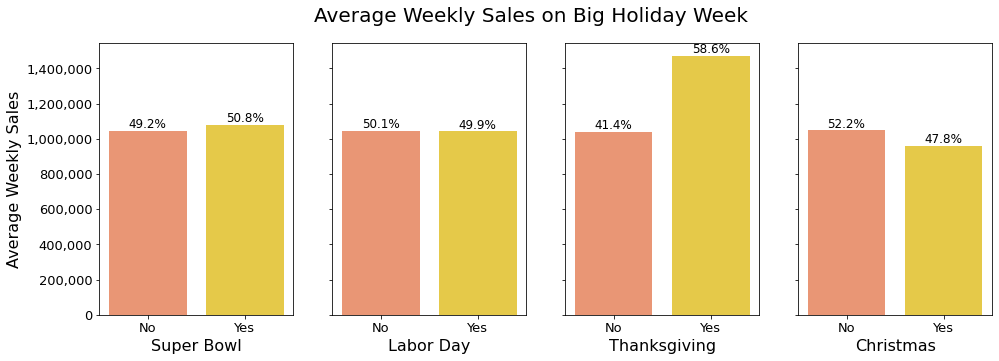

In [ ]:
fig, ax = plt.subplots(ncols = 4, nrows = 1, figsize=(16, 5), sharey = "row")

holiday_cols_name = ["Super_Bowl", "Labor_Day", "Thanksgiving", "Christmas"]
holiday_name = ["Super Bowl", "Labor Day", "Thanksgiving", "Christmas"]

for i in enumerate (holiday_cols_name):
    data_temp = data.groupby(i[1])["Weekly_Sales"].agg("mean").reset_index() #group the sum of weekly sales by holiday
    barplot_with_annotation(i[1], "Weekly_Sales", holiday_name[i[0]], "Average Weekly Sales", data_temp, palette, ax[i[0]])
    if(i[0]>0): ax[i[0]].set(ylabel = None) #to set yaxis ticks off for the second, third, fourth plot
    ax[i[0]].set_xticklabels(Holiday_list) #change ticks from 0-1 into yes-no

fig.suptitle("Average Weekly Sales on Big Holiday Week", fontsize = 20)
# after plotting the data, format the labels
current_values = plt.gca().get_yticks()
# using format string '{:.0f}' here but you can choose others
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.show()

In [ ]:
# Create new columns based on A WEEK BEFORE each specific holiday 

data["Before_Super_Bowl"]   = np.where(data["WeekOfYear"] == 5, 1, 0)
data["Before_Labor_Day"]    = np.where(data["WeekOfYear"] == 35, 1, 0)
data["Before_Thanksgiving"] = np.where(data["WeekOfYear"] == 46, 1, 0)
data["Before_Christmas"]    = np.where(data["WeekOfYear"] == 51, 1, 0)

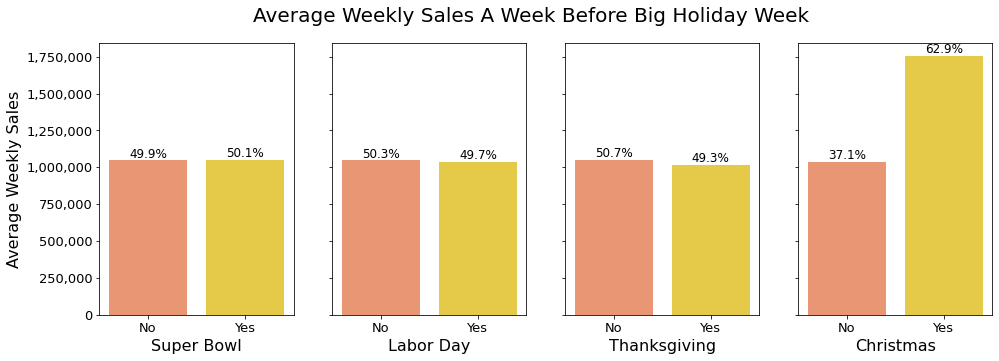

In [ ]:
fig, ax = plt.subplots(ncols = 4, nrows = 1, figsize=(16, 5), sharey = "row")

before_holiday_cols_name = ["Before_Super_Bowl", "Before_Labor_Day", "Before_Thanksgiving", "Before_Christmas"]
holiday_name = ["Super Bowl", "Labor Day", "Thanksgiving", "Christmas"]

for i in enumerate (before_holiday_cols_name):
    data_temp = data.groupby(i[1])["Weekly_Sales"].agg("mean").reset_index() #group the sum of weekly sales by holiday
    barplot_with_annotation(i[1], "Weekly_Sales", holiday_name[i[0]], "Average Weekly Sales", data_temp, palette, ax[i[0]])
    if(i[0]>0): ax[i[0]].set(ylabel = None) #to set yaxis ticks off for the second, third, fourth plot
    ax[i[0]].set_xticklabels(Holiday_list) #change ticks from 0-1 into yes-no

fig.suptitle("Average Weekly Sales A Week Before Big Holiday Week", fontsize = 20)
# after plotting the data, format the labels
current_values = plt.gca().get_yticks()
# using format string '{:.0f}' here but you can choose others
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.show()

During the **Super Bowl** and **Labor Day** holidays, sales were not much different from the week without holidays. Meanwhile, for the week with the **Thanksgiving** holiday, sales were higher than the week without the holiday, with a difference of 16.2%. Meanwhile, for the week with **Christmas** off, sales were lower than the week without holidays with a difference of 3.8%, but sales were higher in the week before the **Christmas** holiday with a difference of 25.8%.

This makes sense because right on **Thanksgiving week**, US stores often hold Black Friday discounts and sometimes Cyber Monday discounts. Then, it seems that people often buy Christmas gifts before the **Christmas** holiday so that sales on Christmas week itself don't increase.

### 1.7.2 Feature Analysis: Day, Month, Year vs Weekly_Sales

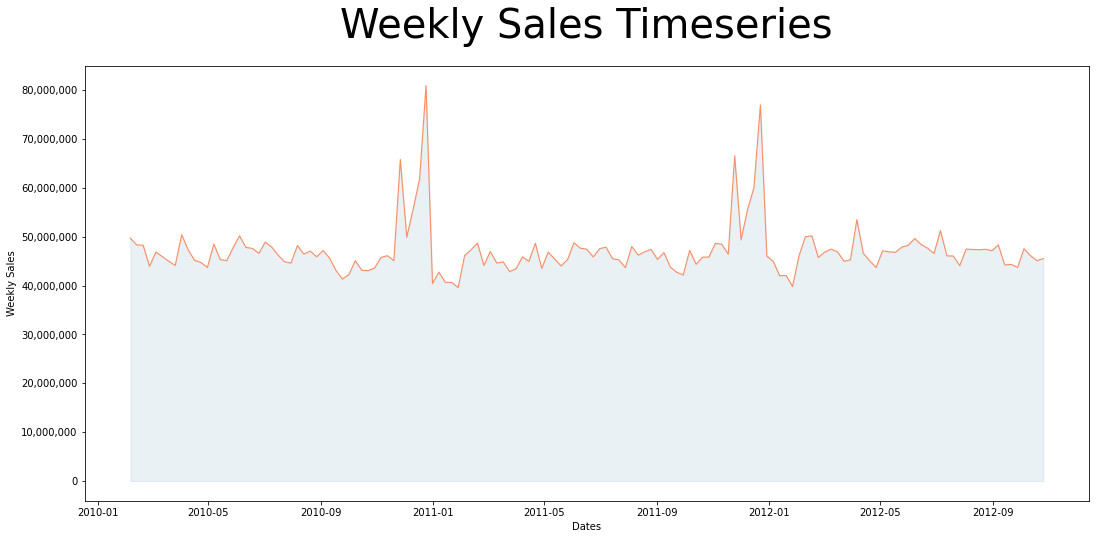

In [ ]:
temp_data = original_data.groupby(['Date']).sum()
fig, ax = plt.subplots(figsize=(18, 8))

plt.title("Weekly Sales Timeseries", fontsize=40, y=1.05)
plt.xlabel('Dates')
plt.ylabel('Weekly Sales')
#list(data['month_year'].astype(str))
ax.fill_between(temp_data.index, temp_data['Weekly_Sales'], color=palette[5], linewidth=1.1, alpha=0.2)
ax.plot(temp_data.index, temp_data['Weekly_Sales'], color=palette[0], linewidth=1.1)
# after plotting the data, format the labels
current_values = plt.gca().get_yticks()
# using format string '{:.0f}' here but you can choose others
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.show()

It can be concluded that the biggest sales occurred around November to December. This strengthens the assumption that November to December is indeed the highest demand for goods

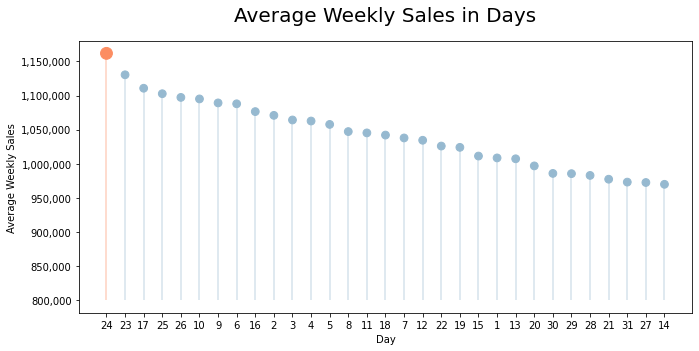

In [ ]:
# Reorder it based on values:
temp_data = data.groupby('Day').mean().sort_values(by='Weekly_Sales', ascending=False)
temp_data['Day'] = temp_data.index.astype(str)
temp_data = temp_data.reset_index(drop=True)

# Create a color if the Sales is Max
my_color=np.where(temp_data['Weekly_Sales']==temp_data['Weekly_Sales'].max(), palette[0], palette[5])
my_size=np.where(temp_data['Weekly_Sales']==temp_data['Weekly_Sales'].max(), 140, 60)
 
# The horizontal plot is made using the vline() function
plt.figure(figsize=(11,5))
plt.vlines(x=temp_data['Day'], ymin=800000, ymax=temp_data['Weekly_Sales'], color=my_color, alpha=0.4)
plt.scatter(temp_data['Day'], temp_data['Weekly_Sales'], color=my_color, s=my_size, alpha=1)
 
# Add title and axis names
plt.title("Average Weekly Sales in Days", fontsize=20, y=1.05)
plt.xlabel('Day')
plt.ylabel('Average Weekly Sales')
# after plotting the data, format the labels
current_values = plt.gca().get_yticks()
# using format string '{:.0f}' here but you can choose others
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
# show the graph
plt.show()

The biggest sales occurred on the 24th. However, it should be noted that the graph is not representative in explaining daily sales because each data is taken every Friday. This means that in 1 week only data is taken once

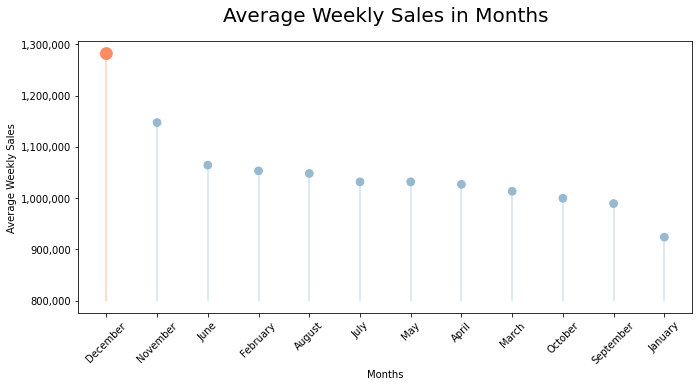

In [ ]:
# Reorder it based on values:
temp_data = data.groupby('Month').mean().sort_values(by='Weekly_Sales', ascending=False)
temp_data['Month'] = temp_data.index.astype(str)
temp_data = temp_data.reset_index(drop=True)

# Create a color if the Sales is Max
my_color=np.where(temp_data['Weekly_Sales']==temp_data['Weekly_Sales'].max(), palette[0], palette[5])
my_size=np.where(temp_data['Weekly_Sales']==temp_data['Weekly_Sales'].max(), 140, 60)
 
# The horizontal plot is made using the vline() function
fig, ax = plt.subplots(figsize=(11,5))
plt.vlines(x=temp_data['Month'], ymin=800000, ymax=temp_data['Weekly_Sales'], color=my_color, alpha=0.4)
plt.scatter(temp_data['Month'], temp_data['Weekly_Sales'], color=my_color, s=my_size, alpha=1)
 
# Add title and axis names
plt.title("Average Weekly Sales in Months", fontsize=20, y=1.05)
plt.xlabel('Months')
plt.ylabel('Average Weekly Sales')
fig.canvas.draw()
labels = [item.get_text() for item in ax.get_xticklabels()]
month_name = original_data[original_data['Date'].dt.year == 2011]['Date'].dt.month_name().unique().astype(str)
for i in range(len(labels)):
  month = int(labels[i])
  labels[i] = str(month_name[month-1])
ax.set_xticklabels(labels, rotation=45)

# after plotting the data, format the labels
current_values = plt.gca().get_yticks()
# using format string '{:.0f}' here but you can choose others
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
# show the graph
plt.show()

The largest weekly average sales in a month occurred in December and followed by November. Of course, that's because there's Thanksgiving and Christmas

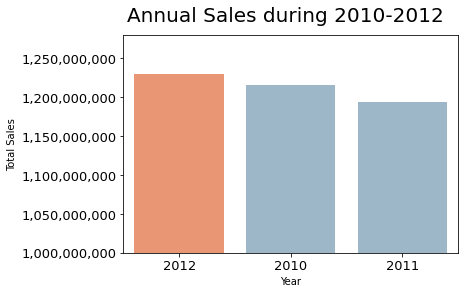

In [ ]:
temp_data = data[(data['Month'] >= 2) & (data['Month'] <= 7)].groupby('Year').sum().sort_values(by='Weekly_Sales', ascending=False)
temp_data['Year'] = temp_data.index.astype(str)
temp_data = temp_data.reset_index(drop=True)

ax = sns.barplot(x = temp_data['Year'], y= temp_data["Weekly_Sales"], palette = [palette[0],palette[5],palette[5]])
#plt.suptitle("'{}' Feature Distribution".format(title), fontsize = 20)
ax.set(ylim=(1000000000, temp_data['Weekly_Sales'].max()+50000000))
plt.suptitle("Annual Sales during 2010-2012", fontsize = 20)
bigger_ticks_font_size(ax)
plt.ylabel('Total Sales')
# after plotting the data, format the labels
current_values = plt.gca().get_yticks()
# using format string '{:.0f}' here but you can choose others
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.show()

It should be noted that the data range is only between February 5, 2010 - October 6, 2012. This means that the data every year is not balanced. So, Total Weekly Sales is calculated from February to July only to see the comparison.

As it turned out, the biggest sales were in 2012.

### 1.7.3 Feature Analysis: Unempoloyment, CPI vs Weekly_Sales

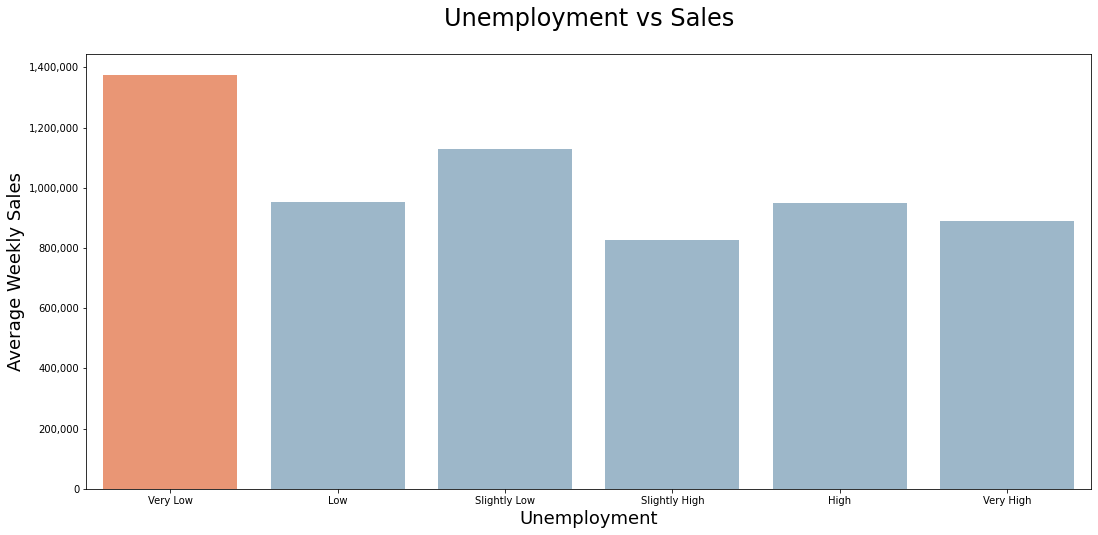

In [ ]:
# No 5 mengklasifikasikan kelas dari Unemployment dan membuat kolom baru bernama Unemployment_class
def unem_classification(unem):
    if unem >= 13:
        return 6
    elif unem >= 11:
        return 5
    elif unem >= 9:
        return 4
    elif unem >= 7:
        return 3
    elif unem >= 5:
        return 2
    elif unem < 5:
        return 1
    else:
        return np.nan

# Menerapkan fungsi unem_classification ke dataframe
data["Unemployment_class"] = data.apply(lambda x: unem_classification(x.Unemployment), axis=1)

temp_data = data.groupby("Unemployment_class").mean()
temp_data['Unemployment_class'] = temp_data.index.astype(str)
temp_data = temp_data.reset_index(drop=True)

fig, ax = plt.subplots(figsize=(18,8))

my_color=np.where(temp_data['Weekly_Sales']==temp_data['Weekly_Sales'].max(), palette[0], palette[5])
sns.barplot(x = temp_data['Unemployment_class'], y= temp_data["Weekly_Sales"], palette = my_color)
plt.title("Unemployment vs Sales", fontsize=24, y=1.05)
plt.xlabel('Unemployment', fontsize=18)
plt.ylabel('Average Weekly Sales', fontsize=18)
fig.canvas.draw()
unemClass = ['Very Low','Low','Slightly Low','Slightly High','High','Very High']
labels = [item.get_text() for item in ax.get_xticklabels()]
for i in range(len(labels)):
  unemp = int(labels[i])
  labels[i] = str(unemClass[unemp-1])
ax.set_xticklabels(labels)
# after plotting the data, format the labels
current_values = plt.gca().get_yticks()
# using format string '{:.0f}' here but you can choose others
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.show()

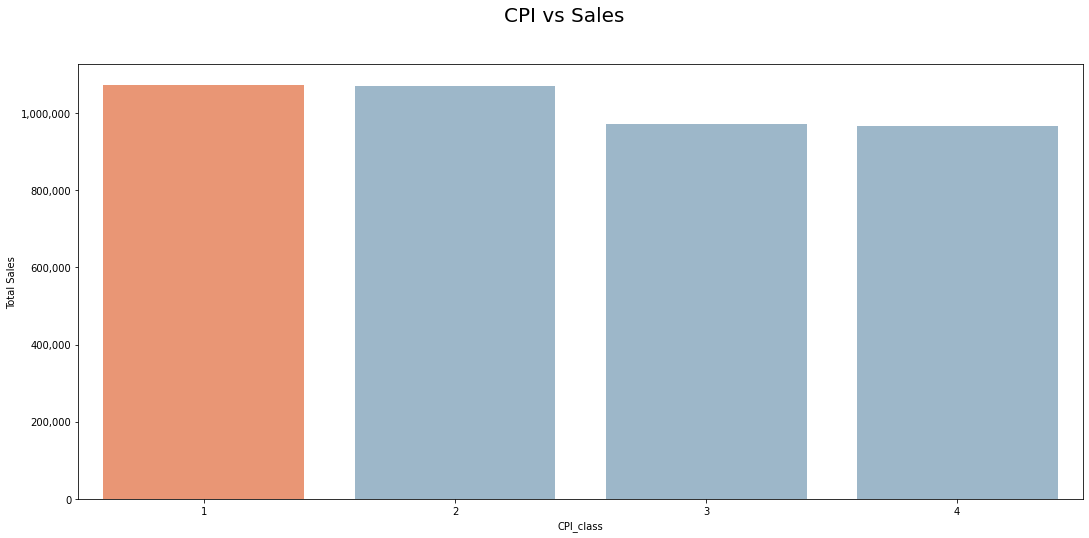

In [ ]:
# No 5 mengklasifikasikan kelas dari CPI dan membuat kolom baru bernama CPI_class
def CPI_classification(unem):
    if unem >= 214:
        return 4
    elif unem >= 213:
        return 3
    elif unem >= 212:
        return 2
    elif unem < 212:
        return 1
    else:
        return np.nan

# Menerapkan fungsi CPI_classification ke dataframe
data["CPI_class"] = data.apply(lambda x: CPI_classification(x.CPI), axis=1)

temp_data = data.groupby("CPI_class").mean()
temp_data['CPI_class'] = temp_data.index.astype(str)
temp_data = temp_data.reset_index(drop=True)
zenius = ['#A338EB', '#FFC007']

fig = plt.subplots(figsize=(18,8))
my_color=np.where(temp_data['Weekly_Sales']==temp_data['Weekly_Sales'].max(), palette[0], palette[5])
sns.barplot(x = temp_data['CPI_class'], y= temp_data["Weekly_Sales"], palette = my_color)
plt.suptitle("CPI vs Sales", fontsize = 20)
plt.ylabel('Total Sales')
# after plotting the data, format the labels
current_values = plt.gca().get_yticks()
# using format string '{:.0f}' here but you can choose others
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.show()

Dari Grafik Unemployment vs Sales dan CPI vs Sales, tampaknya faktor ekonomi tidak terlalu banyak dalam mempengaruhi Weekly Sales dibandingkan Hari Libur Besar.

### 1.7.4 Feature Analysis: Monthly Sales vs Store Number

In [ ]:
data_temp = data.copy(deep = True)

# Create a new column for "Year-Month" format
data_temp["Month_Year"] = original_data["Date"].dt.to_period("M")
data_temp["Month_Year"].unique()

<PeriodArray>
['2010-02', '2010-03', '2010-04', '2010-05', '2010-06', '2010-07', '2010-08',
 '2010-09', '2010-10', '2010-11', '2010-12', '2011-01', '2011-02', '2011-03',
 '2011-04', '2011-05', '2011-06', '2011-07', '2011-08', '2011-09', '2011-10',
 '2011-11', '2011-12', '2012-01', '2012-02', '2012-03', '2012-04', '2012-05',
 '2012-06', '2012-07', '2012-08', '2012-09', '2012-10']
Length: 33, dtype: period[M]

In [ ]:
import plotly.express as px

# Create a new column to store "Month_Year"
data_temp["Month_Year"] = data_temp["Month_Year"].astype(str)

# Group Total Weekly_Sales by Store and Month_Year
sales = data_temp.groupby(["Store","Month_Year"])["Weekly_Sales"].sum().reset_index()

# Plot animation bar chart
fig = px.bar(sales, x = "Weekly_Sales", y = "Store",
             orientation = "h", height=700, title=" TOTAL MONTHLY SALES BY STORE NUMBER",
            animation_frame = "Month_Year", animation_group = "Store", range_x = [0,15000000], template = "seaborn", color = "Store", )
fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 1000

# Change bar color
fig.update_traces(marker_color = palette[:5]*9)
#Change bar color throghout all frames
for f in fig.frames:
    f.data[0].update(marker_color = palette[:5]*9)
fig.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/numeric.py:2446: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



## 2.4 Finding and Handling Outliers

In [ ]:
def finding_outlier(data, column):
  Q1 = data[column].quantile(0.25)
  Q3 = data[column].quantile(0.75)
  IQR  = Q3-Q1
  lower_bound = (Q1-(1.5*IQR))
  upper_bound = (Q3+(1.5*IQR))
  outlier = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
  
  return outlier

In [ ]:
finding_outlier(data, "Temperature")

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year,...,Super_Bowl,Labor_Day,Thanksgiving,Christmas,Before_Super_Bowl,Before_Labor_Day,Before_Thanksgiving,Before_Christmas,Unemployment_class,CPI_class
910,7,558027.77,0,-2.06,3.011,191.762589,8.818,4,2,2011,...,0,0,0,0,1,0,0,0,3,1
2336,17,1083071.14,0,6.23,2.891,127.191774,6.866,7,1,2011,...,0,0,0,0,0,0,0,0,2,1
3626,26,817485.14,0,5.54,3.243,133.105968,7.907,28,1,2011,...,0,0,0,0,0,0,0,0,3,1


The outlier value for the "Temperature" feature still seems reasonable because there are only 3 data, then the value is very low and it is very likely to happen in winter. Winter in the US usually lasts from December, January, and February which is according to the *outlier* data above. Therefore, we will leave this outlier.

In [ ]:
finding_outlier(data, "Unemployment")

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year,...,Super_Bowl,Labor_Day,Thanksgiving,Christmas,Before_Super_Bowl,Before_Labor_Day,Before_Thanksgiving,Before_Christmas,Unemployment_class,CPI_class
555,4,2224499.28,0,80.37,3.187,130.719633,4.077,6,7,2012,...,0,0,0,0,0,0,0,0,1,1
556,4,2100252.61,0,76.86,3.224,130.683000,4.077,13,7,2012,...,0,0,0,0,0,0,0,0,1,1
557,4,2175563.69,0,79.14,3.263,130.701290,4.077,20,7,2012,...,0,0,0,0,0,0,0,0,1,1
558,4,2048613.65,0,81.06,3.356,130.719581,4.077,27,7,2012,...,0,0,0,0,0,0,0,0,1,1
559,4,2174514.13,0,83.86,3.374,130.737871,4.077,3,8,2012,...,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5715,40,919595.44,0,50.98,4.018,138.739500,4.156,28,9,2012,...,0,0,0,0,0,0,0,0,1,1
5716,40,1069112.00,0,57.21,4.027,138.825600,4.145,5,10,2012,...,0,0,0,0,0,0,0,0,1,1
5717,40,982523.26,0,47.35,4.029,138.911700,4.145,12,10,2012,...,0,0,0,0,0,0,0,0,1,1
5718,40,918170.50,0,46.33,4.000,138.833613,4.145,19,10,2012,...,0,0,0,0,0,0,0,0,1,1


The outlier value in the "Unemployment" feature consists of 481 lines, which is quite a lot. Based on the boxplot in the previous code block, the outlier values are in the lower and upper quartile. Let's group the data by quartiles to see if low levels of *unemployment* have certain traits and vice versa.

In [ ]:
Q1 = data["Unemployment"].quantile(0.25)
Q3 = data["Unemployment"].quantile(0.75)
IQR  = Q3-Q1
outlier_lower_bound = data[(data["Unemployment"] < (Q1-(1.5*IQR)))]
outlier_upper_bound = data[(data["Unemployment"] > (Q3+(1.5*IQR)))]

In [ ]:
print(outlier_lower_bound["Year"].unique(), outlier_upper_bound["Year"].unique())

[2012] [2010 2011 2012]


It turns out that the low unemployment rate (which was in the lower bound) occurred in 2012, while the high one (which was in the upper bound) occurred throughout the year. We don't have enough data to *handling* this outlier so there will be 3 scenarios used, namely (1) *outlier* left (2) outlier removed (3) outlier transformation

In [ ]:
data_dropped_outlier = data.drop(outlier_lower_bound.index)
data_dropped_outlier = data.drop(outlier_upper_bound.index)

In [ ]:
# Flooring and capping outliers
data_tf_outlier = data.copy()

percentiles = data["Unemployment"].quantile([0.1, 0.9]).values
data_tf_outlier["Unemployment"] = np.clip(data["Unemployment"], percentiles[0], percentiles[1]) 
# Values smaller than percentiles[0] (10% percentile) will become percentiles[0]
# Values bigger than percentiles[1] (90% percentile) will become percentiles[1]

print("Low percentile: ", percentiles[0])
print("High percentile: ", percentiles[1])
print("")

print("Sisa outliers fitur Unemployment pada Dataset 1 (outlier dibiarkan):", len(finding_outlier(data,"Unemployment")))
print("Sisa outliers fitur Unemployment pada Dataset 2 (seluruh outlier di-drop):", len(finding_outlier(data_dropped_outlier,"Unemployment")))
print("Sisa outliers fitur Unemployment pada Dataset 3 (flooring dan capping outlier):", len(finding_outlier(data_tf_outlier,"Unemployment")))

Low percentile:  6.061
High percentile:  9.863

Sisa outliers fitur Unemployment pada Dataset 1 (outlier dibiarkan): 481
Sisa outliers fitur Unemployment pada Dataset 2 (seluruh outlier di-drop): 181
Sisa outliers fitur Unemployment pada Dataset 3 (flooring dan capping outlier): 0


In the 2nd dataset, there are still outliers left after all outliers were dropped. This happens because after the outliers are dropped, the distribution of the data changes so that the values that were not outliers (above the lower quartile and below the upper quartile) will become data with the most extreme values so that they are detected as outliers.

In [ ]:
data_dropped_outlier

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year,...,Super_Bowl,Labor_Day,Thanksgiving,Christmas,Before_Super_Bowl,Before_Labor_Day,Before_Thanksgiving,Before_Christmas,Unemployment_class,CPI_class
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,5,2,2010,...,0,0,0,0,1,0,0,0,3,1
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,12,2,2010,...,1,0,0,0,0,0,0,0,3,1
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,19,2,2010,...,0,0,0,0,0,0,0,0,3,1
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,26,2,2010,...,0,0,0,0,0,0,0,0,3,1
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,5,3,2010,...,0,0,0,0,0,0,0,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6430,45,713173.95,0,64.88,3.997,192.013558,8.684,28,9,2012,...,0,0,0,0,0,0,0,0,3,1
6431,45,733455.07,0,64.89,3.985,192.170412,8.667,5,10,2012,...,0,0,0,0,0,0,0,0,3,1
6432,45,734464.36,0,54.47,4.000,192.327265,8.667,12,10,2012,...,0,0,0,0,0,0,0,0,3,1
6433,45,718125.53,0,56.47,3.969,192.330854,8.667,19,10,2012,...,0,0,0,0,0,0,0,0,3,1


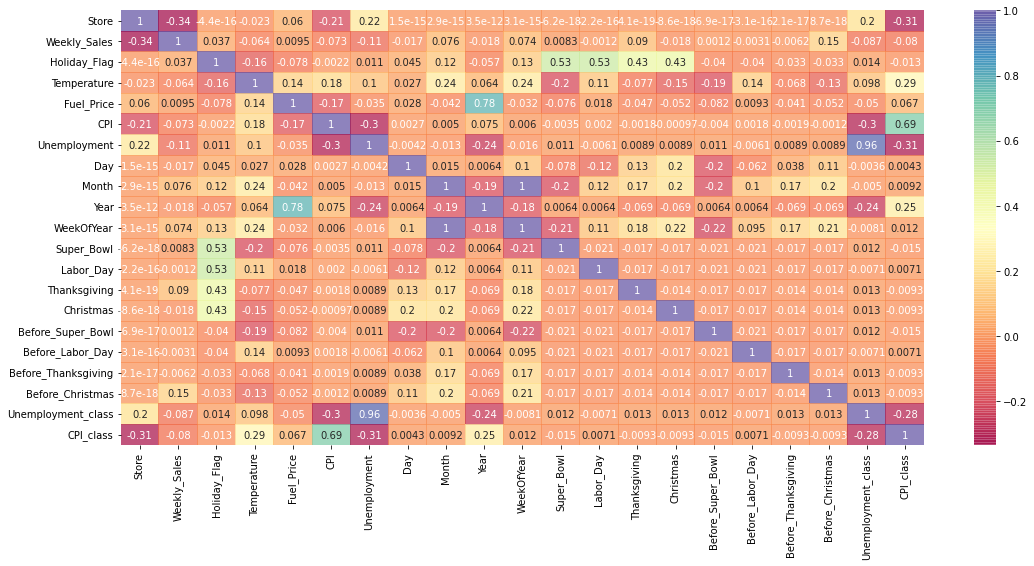

In [ ]:
plt.figure(figsize=(18, 8))
sns.heatmap(data = data.corr(), cmap = "Spectral", annot = True, alpha = 0.7)

## 1.9 Data Encoding

Categorical data needs to be encoded in order for the model to make better predictions. The "Store" feature is actually already numeric data and can be processed by the model, its value consists of 1-45. However, our model will think there is a hierarchy or order of the features, such as 1 < 2 < 3 ... < 45, whereas the "Store" feature does not have such a hierarchy (Store 1 is not less than/level lower than Store 2 and vice versa). So we need to separate the "Store" column into several columns with values ​​1 and 0.

For categorical data that is *binary* like Holiday_Flag, we don't need data encoding anymore because it will be redundant later (source: [stackoverflow](https://stackoverflow.com/questions/43515877/should-binary-features-be-one -hot-encoded)). So, not all categorical data will be encoded, the features we will encode are Store, Day, Month, Year, and WeekOfYear. We will use Dummy Encoding here because fewer variables will be generated compared to One-Hot Encoding (source: [Toward Data Science](https://towardsdatascience.com/encoding-categorical-variables-one-hot-vs- dummy-encoding-6d5b9c46e2db#:~:text=Both%20expand%20the%20feature%20space,category%20in%20each%20categorical%20variable.))

In [ ]:
# Store all column names that we want to encode
cols_to_encode = ["Store", "Day", "Month", "Year", "WeekOfYear"]

# Create a copy of each dataframe
data_enc = data.copy(deep = True)
data_drop_outlier_enc = data_dropped_outlier.copy(deep = True)
data_tf_outlier_enc = data_tf_outlier.copy(deep = True)

# Dummy encoding
for i in cols_to_encode:
    # Data with outliers
    data_enc = pd.concat([data_enc.drop([i], axis=1), pd.DataFrame(pd.get_dummies(data_enc[i], prefix=str(i)))], axis = 1)
    # Data with outliers dropped                      
    data_drop_outlier_enc = pd.concat([data_drop_outlier_enc.drop([i], axis=1), pd.DataFrame(pd.get_dummies(data_drop_outlier_enc[i], prefix=str(i)))], axis = 1)           
    # Data with outliers floored and capped
    data_tf_outlier_enc = pd.concat([data_tf_outlier_enc.drop([i], axis=1), pd.DataFrame(pd.get_dummies(data_tf_outlier_enc[i], prefix=str(i)))], axis = 1)

In [ ]:
pd.set_option("display.max_columns", 500)
data_enc

,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Super_Bowl,Labor_Day,Thanksgiving,Christmas,Before_Super_Bowl,Before_Labor_Day,Before_Thanksgiving,Before_Christmas,Unemployment_class,CPI_class,Store_1,Store_2,Store_3,Store_4,Store_5,Store_6,Store_7,Store_8,Store_9,Store_10,Store_11,Store_12,Store_13,Store_14,Store_15,Store_16,Store_17,Store_18,Store_19,Store_20,Store_21,Store_22,Store_23,Store_24,Store_25,Store_26,Store_27,Store_28,Store_29,Store_30,Store_31,Store_32,Store_33,Store_34,Store_35,Store_36,Store_37,Store_38,Store_39,Store_40,Store_41,Store_42,Store_43,Store_44,Store_45,Day_1,Day_2,Day_3,Day_4,Day_5,Day_6,Day_7,Day_8,Day_9,Day_10,Day_11,Day_12,Day_13,Day_14,Day_15,Day_16,Day_17,Day_18,Day_19,Day_20,Day_21,Day_22,Day_23,Day_24,Day_25,Day_26,Day_27,Day_28,Day_29,Day_30,Day_31,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,Year_2010,Year_2011,Year_2012,WeekOfYear_1,WeekOfYear_2,WeekOfYear_3,WeekOfYear_4,WeekOfYear_5,WeekOfYear_6,WeekOfYear_7,WeekOfYear_8,WeekOfYear_9,WeekOfYear_10,WeekOfYear_11,WeekOfYear_12,WeekOfYear_13,WeekOfYear_14,WeekOfYear_15,WeekOfYear_16,WeekOfYear_17,WeekOfYear_18,WeekOfYear_19,WeekOfYear_20,WeekOfYear_21,WeekOfYear_22,WeekOfYear_23,WeekOfYear_24,WeekOfYear_25,WeekOfYear_26,WeekOfYear_27,WeekOfYear_28,WeekOfYear_29,WeekOfYear_30,WeekOfYear_31,WeekOfYear_32,WeekOfYear_33,WeekOfYear_34,WeekOfYear_35,WeekOfYear_36,WeekOfYear_37,WeekOfYear_38,WeekOfYear_39,WeekOfYear_40,WeekOfYear_41,WeekOfYear_42,WeekOfYear_43,WeekOfYear_44,WeekOfYear_45,WeekOfYear_46,WeekOfYear_47,WeekOfYear_48,WeekOfYear_49,WeekOfYear_50,WeekOfYear_51,WeekOfYear_52
0,1643690.90,0,42.31,2.572,211.096358,8.106,0,0,0,0,1,0,0,0,3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1641957.44,1,38.51,2.548,211.242170,8.106,1,0,0,0,0,0,0,0,3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1611968.17,0,39.93,2.514,211.289143,8.106,0,0,0,0,0,0,0,0,3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1409727.59,0,46.63,2.561,211.319643,8.106,0,0,0,0,0,0,0,0,3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1554806.68,0,46.50,2.625,211.350143,8.106,0,0,0,0,0,0,0,0,3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

## 1.10 Exporting Data

In [ ]:
data.to_csv("/data/data.csv", index=False)
data_dropped_outlier.to_csv("/data/data_dropped_outlier.csv", index=False)
data_tf_outlier.to_csv("/data/data_tf_outlier.csv", index=False)
data_enc.to_csv("/data/data_enc.csv", index=False)
data_drop_outlier_enc.to_csv("/data/data_drop_outlier_enc.csv", index=False)
data_tf_outlier_enc.to_csv("/data/data_tf_outlier_enc.csv", index=False)